<a href="https://colab.research.google.com/github/Habib-20/kel1-project-apm/blob/main/ANN_Single_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Mengubah data string menjadi angka
titanic.loc[titanic.Sex == 'male'] = 0
titanic.loc[titanic.Sex == 'female'] = 1
titanic[['Pclass']] = titanic[['Pclass']].astype(float)
titanic[['Sex']] = titanic[['Sex']].astype(float)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0
1,1,1,1.0,1,1.0,1.0,1,1,1,1.0,1,1
2,1,1,1.0,1,1.0,1.0,1,1,1,1.0,1,1
3,1,1,1.0,1,1.0,1.0,1,1,1,1.0,1,1
4,0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0


In [6]:
#pendefinisian sigmoid dan derivative sigmoid activator
def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
#Menentukan Varibale Independen yang akan Digunakan (‘Pclass’, ‘Sex')
x = titanic[["Pclass", "Sex"]]
print(f'input = \n{x}')

input = 
     Pclass  Sex
0       0.0  0.0
1       1.0  1.0
2       1.0  1.0
3       1.0  1.0
4       0.0  0.0
..      ...  ...
886     0.0  0.0
887     1.0  1.0
888     1.0  1.0
889     0.0  0.0
890     0.0  0.0

[891 rows x 2 columns]


In [7]:
#Menentukan Variabel Dependen yang akan Dipakai (‘Survived’)
y = titanic["Survived"]
print(f'\ntarget = \n{y}')


target = 
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Survived, Length: 891, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, train_size = 0.70)

#menentukan input koneksi pada neuron
NUM_FEATURES = 2
#menentukan banyaknya iterasi
NUM_ITER = 100
#menentukan learning rate
learning_rate = 0.1
#menentukan weight
W = np.zeros(NUM_FEATURES, np.float32)
#menentukan bias
b = np.zeros (1, np.float32)

In [9]:
#training model
for i in range(NUM_ITER):
    y_pred = np.dot(x, W) + b
    
    #Activation
    y_pred[y_pred > 0] = 1
    y_pred[y_pred <= 0] = 0
    
    err = y - y_pred
    if np.sum(err) == 0:
        break
    
    delta_W = learning_rate * np.dot(np.transpose(x), err)
    delta_b = learning_rate * np.sum(err)
    W = W + delta_W
    b = b + delta_b
    print("Iterasi ke-" + str(i), err, W, b)

Iterasi ke-0 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    1.0
889    0.0
890    0.0
Name: Survived, Length: 891, dtype: float64 [31.4 31.4] [31.4]
Iterasi ke-1 0     -1.0
1      0.0
2      0.0
3      0.0
4     -1.0
      ... 
886   -1.0
887    0.0
888    0.0
889   -1.0
890   -1.0
Name: Survived, Length: 891, dtype: float64 [31.4 31.4] [-26.300001]


W:[31.4 31.4]
b:[-26.300001]
plot_y:[ 1.03757965 -0.36242035]


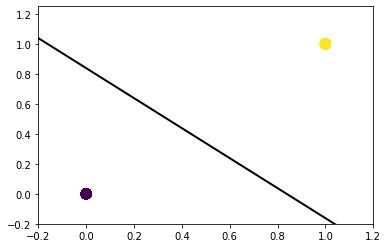

In [10]:
#Visualisasi Data Menggunakan Scatter Plot
plot_x = np.array([np.min(x.iloc[:, 0] - 0.2), np.max(x.iloc[:, 1]+0.2)])
plot_y = -1 / W[1] * (W[0] * plot_x + b)

print('W:' + str(W))
print('b:' + str(b))
print('plot_y:' + str(plot_y))

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

In [13]:
#Mengeluarkan Gradient Descent (Bobot Baru dan Bias Baru)
for i in range(NUM_ITER):
    #Mencari Nilai Prediksi
    y_pred = np.dot(x, W) + b
    #Activation Sigmoid dan Hitung Nilai Error
    y_pred = 1.0 / (1.0 + np.exp(-y_pred))
    err = y - y_pred
    
    delta_W = learning_rate * np.dot(np.transpose(x), err)
    delta_b = learning_rate * np.sum(err)
    W = W + delta_W
    b = b + delta_b
    print("Interasi ke-" + str(i), err, W, b, "Error :" + str(np.abs(np.sum(err) / np.sum(y))))
    if np.abs(np.sum(err) / np.sum(y)) <= 0.1:
        break

Interasi ke-0 0     -3.784902e-12
1      2.220446e-16
2      2.220446e-16
3      2.220446e-16
4     -3.784902e-12
           ...     
886   -3.784902e-12
887    2.220446e-16
888    2.220446e-16
889   -3.784902e-12
890   -3.784902e-12
Name: Survived, Length: 891, dtype: float64 [31.4 31.4] [-26.300001] Error :6.954836563618877e-12


In [14]:
#Menjalankan Prediksi Menggunakan Data Test
x_test = x.values
for x_test_item in x_test:
    y_test = np.dot(x_test_item, W) + b
    y_test = 1 if y_test > 0 else 0
    print(str(x_test_item[0]) + ' AND ' + str(x_test_item[1]) + ' = ' + str(y_test))

0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 0.0 = 0
0.0 AND 0.0 = 0
1.0 AND 1.0 = 1
0.0 AND 

In [15]:
#Menghitung Akurasi Prediksi Menggunakan Confusion Matrix
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, train_size=0.80)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[129,   0],
       [  0,  50]])

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


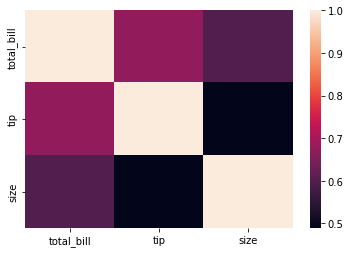

In [16]:
#Melakukan Visualisasi dengan Heatmap
import seaborn as sns
titanic = sns.load_dataset('tips')
titanic = titanic.corr()
print(titanic)
sns.heatmap(titanic)
plt.show()